In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.drop('Age', axis=1, inplace=True)
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


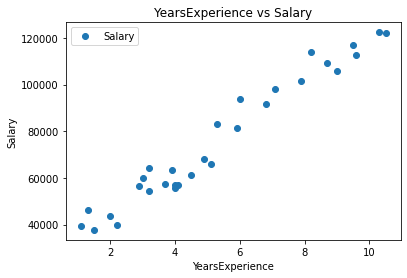

In [6]:
dataset.plot(x='YearsExperience', y='Salary', style='o')
plt.title("YearsExperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
# Defining X as a dataframe with all rows and first column (years experience)
X = dataset.iloc[:, :1].values

# Defining y as a daframe with all rows and last column (Salary)
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
print(model.intercept_)

26780.09915062818


In [11]:
print(model.coef_)

[9312.57512673]


In [12]:
# Generating a series of predictions with our model using testing data.
y_pred = model.predict(X_test)

In [22]:
df = pd.DataFrame(data=zip(y_test, y_pred), columns = ['Actual', 'Predicted'])
df

,Actual,Predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


In [23]:
from sklearn import metrics

print("Mean Absolute Err:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Err:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Err:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Err: 2446.1723690465055
Mean Squared Err: 12823412.298126549
Root Mean Squared Err: 3580.979237321343
